In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('E_Commerce.csv')

# Displaying the first few rows of the dataframe
print(df.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [3]:
# Checking for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [4]:
# Checking the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (10999, 12)


In [5]:
# Checking for duplicate rows in the dataset
duplicates = df.duplicated().sum()

# Displaying the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [6]:
# Check the number of unique values in the 'Warehouse_block' column
warehouse_counts = df['Warehouse_block'].value_counts()

# Display the counts
print(warehouse_counts)


Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


In [7]:
# Check the unique values in the 'Mode_of_Shipment' column
shipment_modes = df['Mode_of_Shipment'].unique()

# Print the unique modes of shipment
print(f"Modes of Shipment: {shipment_modes}")


Modes of Shipment: ['Flight' 'Ship' 'Road']


In [8]:
# Grouping by Mode_of_Shipment and calculating the mean of Reached.on.Time_Y.N
shipment_on_time_mean = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean()

# Displaying the results
print(shipment_on_time_mean)



Mode_of_Shipment
Flight    0.601576
Road      0.588068
Ship      0.597561
Name: Reached.on.Time_Y.N, dtype: float64


In [9]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any exist
df = df.drop_duplicates()


Number of duplicate rows: 0


In [10]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# Exploratory Data Analysis (EDA) 

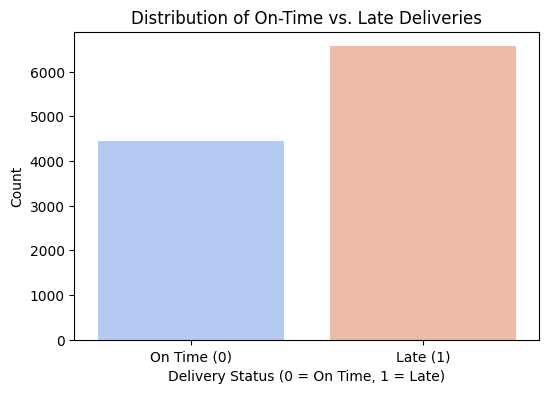

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar chart
plt.figure(figsize=(6,4))
sns.countplot(x='Reached.on.Time_Y.N', data=df, palette="coolwarm", hue='Reached.on.Time_Y.N', legend=False)
plt.xlabel("Delivery Status (0 = On Time, 1 = Late)")
plt.ylabel("Count")
plt.title("Distribution of On-Time vs. Late Deliveries")
plt.xticks([0,1], ['On Time (0)', 'Late (1)'])
plt.show()


Observation: The dataset is imbalanced, with more late deliveries than on-time deliveries.

In [12]:
print("\nshipment Method Distribution:")
print(df['Mode_of_Shipment'].value_counts())


shipment Method Distribution:
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


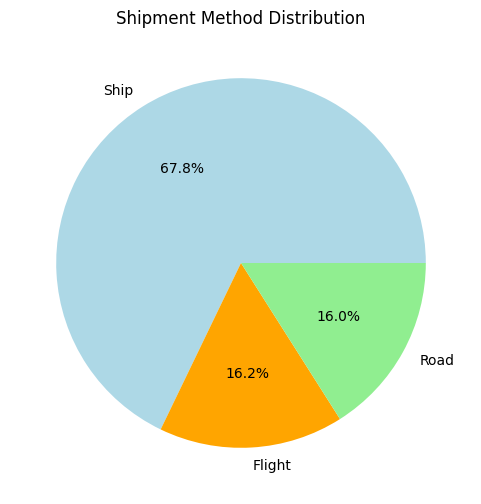

In [13]:
plt.figure(figsize=(6,6))
df['Mode_of_Shipment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange', 'lightgreen'])
plt.title("Shipment Method Distribution")
plt.ylabel("")  # Hide y-label
plt.show()


Observation: Ship is the most used mode of delivery, followed by Road and Flight.
Impact: If Ship has the highest late deliveries, it may indicate slower shipment processing.


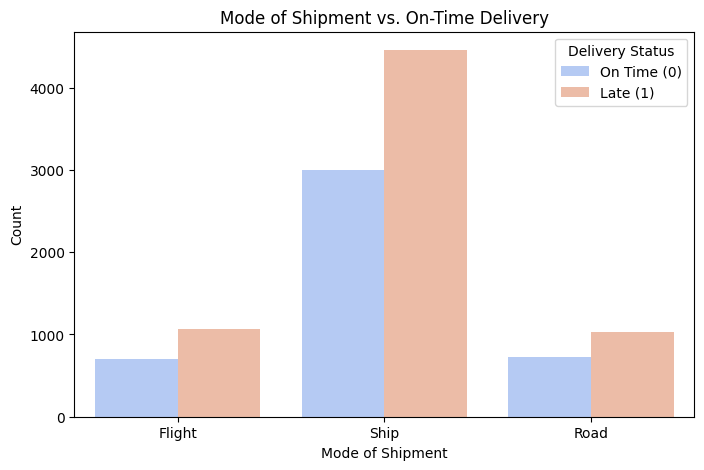

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, palette="coolwarm")
plt.xlabel("Mode of Shipment")
plt.ylabel("Count")
plt.title("Mode of Shipment vs. On-Time Delivery")
plt.legend(title="Delivery Status", labels=["On Time (0)", "Late (1)"])
plt.show()


In [15]:
print("\nWarehouse Distribution:")
print(df['Warehouse_block'].value_counts())



Warehouse Distribution:
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


C:\Users\imogen\AppData\Local\Temp\ipykernel_20936\862360743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Warehouse_block', y='Reached.on.Time_Y.N', data=df, estimator=sum, palette="coolwarm")


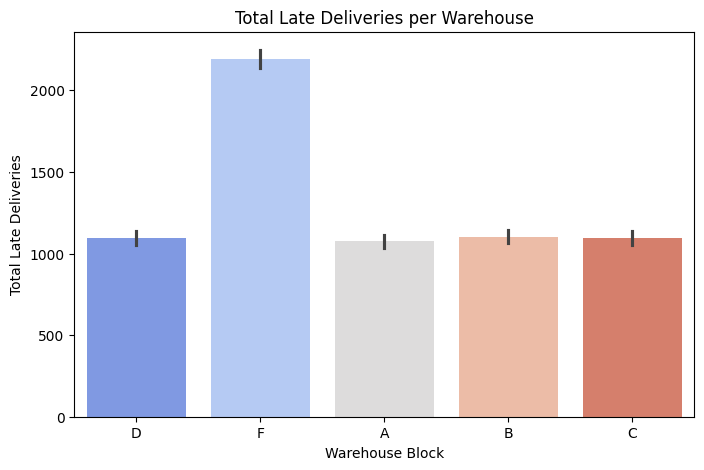

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Warehouse_block', y='Reached.on.Time_Y.N', data=df, estimator=sum, palette="coolwarm")
plt.xlabel("Warehouse Block")
plt.ylabel("Total Late Deliveries")
plt.title("Total Late Deliveries per Warehouse")
plt.show()


Helps visualize which warehouse has the highest delays in a bar chart.

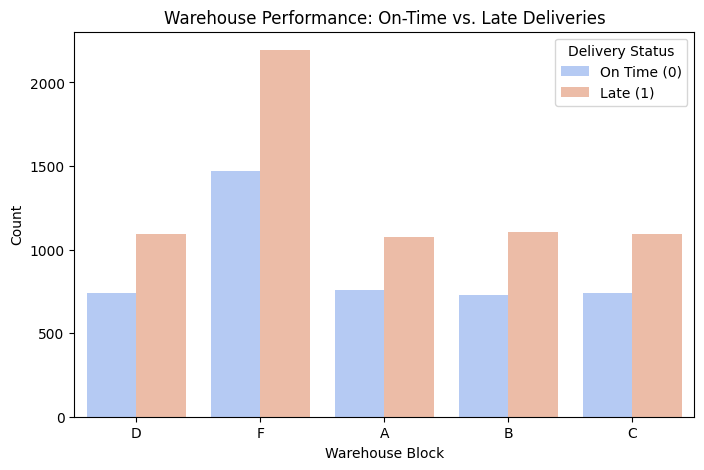

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df, palette="coolwarm")
plt.xlabel("Warehouse Block")
plt.ylabel("Count")
plt.title("Warehouse Performance: On-Time vs. Late Deliveries")
plt.legend(title="Delivery Status", labels=["On Time (0)", "Late (1)"])
plt.show()


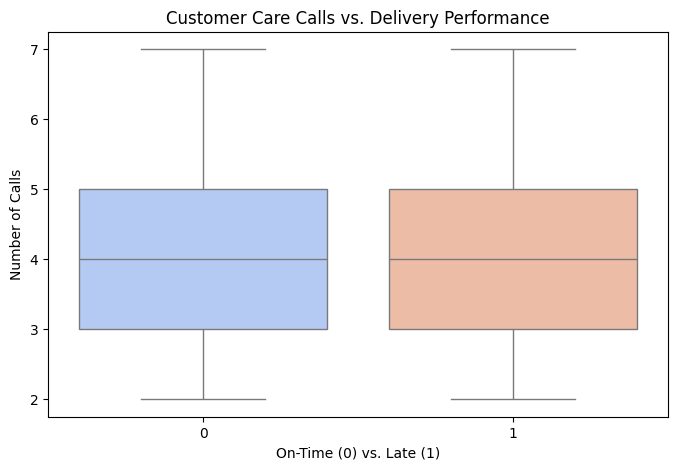

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_care_calls', data=df, palette="coolwarm", hue='Reached.on.Time_Y.N', legend=False)
plt.xlabel("On-Time (0) vs. Late (1)")
plt.ylabel("Number of Calls")
plt.title("Customer Care Calls vs. Delivery Performance")
plt.show()



Observation:
Customers who call more tend to have more late deliveries (likely due to complaints).
Returning customers (more prior purchases) tend to experience faster deliveries.

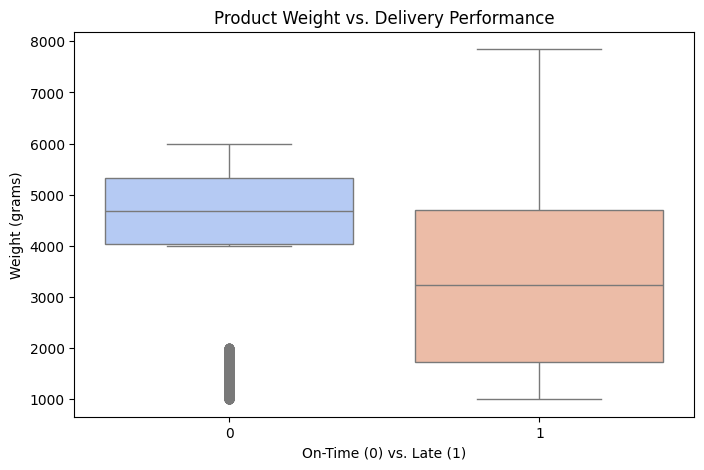

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df, hue='Reached.on.Time_Y.N', palette="coolwarm", legend=False)
plt.xlabel("On-Time (0) vs. Late (1)")
plt.ylabel("Weight (grams)")
plt.title("Product Weight vs. Delivery Performance")
plt.show()


Product Weight vs. Delivery Time
Does a heavier product take longer to deliver?

Observation:
Heavier products tend to be delayed more.
More expensive products tend to be delivered on time more frequently.
Impact: Shipping logistics may prioritize higher-value products, affecting delivery times.

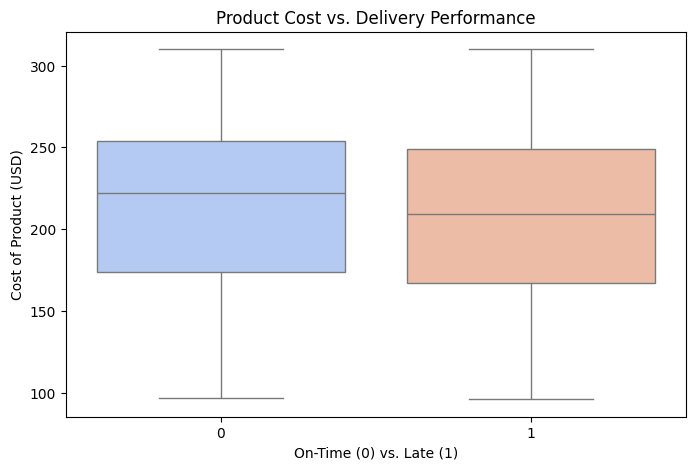

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_of_the_Product', data=df, hue='Reached.on.Time_Y.N', palette="coolwarm", legend=False)
plt.xlabel("On-Time (0) vs. Late (1)")
plt.ylabel("Cost of Product (USD)")
plt.title("Product Cost vs. Delivery Performance")
plt.show()


Cost of the Product vs. Delivery Time
Are expensive products delivered faster or slower? 

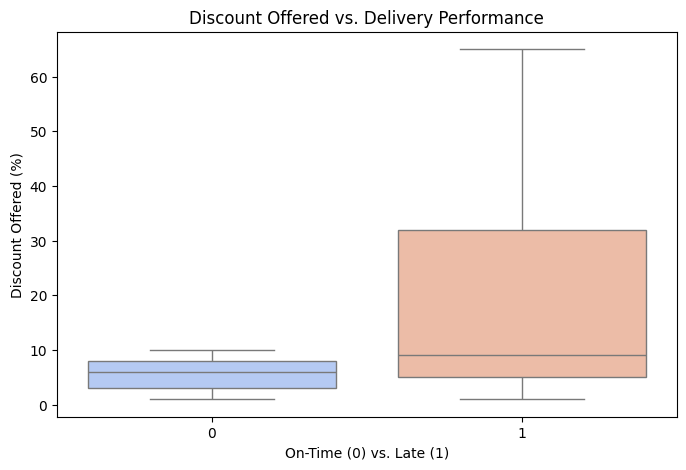

In [21]:
#Discounts vs Delivery Perfomance.
plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, hue='Reached.on.Time_Y.N', palette="coolwarm", legend=False)
plt.xlabel("On-Time (0) vs. Late (1)")
plt.ylabel("Discount Offered (%)")
plt.title("Discount Offered vs. Delivery Performance")
plt.show()


Do higher discounts lead to more late deliveries?
Are products with little to no discount delivered on time more often?

Observation: Products with higher discounts tend to be delivered on time, while low-discount products experience more delays.
Impact: Businesses may be prioritizing high-discount promotions over regular-priced items.


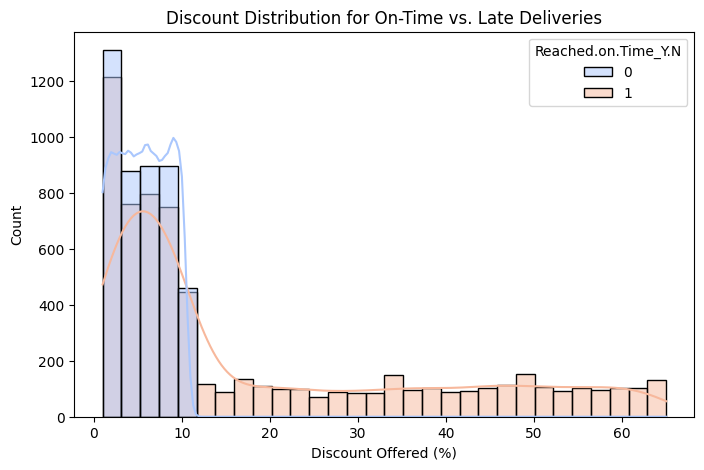

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Discount_offered", hue="Reached.on.Time_Y.N", bins=30, kde=True, palette="coolwarm")
plt.xlabel("Discount Offered (%)")
plt.ylabel("Count")
plt.title("Discount Distribution for On-Time vs. Late Deliveries")
plt.show()


It shows how many deliveries got each discount percentage.



It shows the average discount given for on-time vs. late deliveries.



In [23]:
#Customer Gender & Product Delivery Performance
print("\nCustomer Gender Distribution:")
print(df['Gender'].value_counts())



Customer Gender Distribution:
Gender
F    5545
M    5454
Name: count, dtype: int64


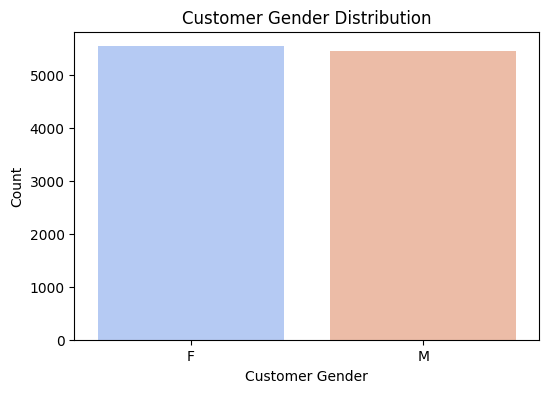

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette="coolwarm", hue='Gender', legend=False)
plt.xlabel("Customer Gender")
plt.ylabel("Count")
plt.title("Customer Gender Distribution")
plt.show()



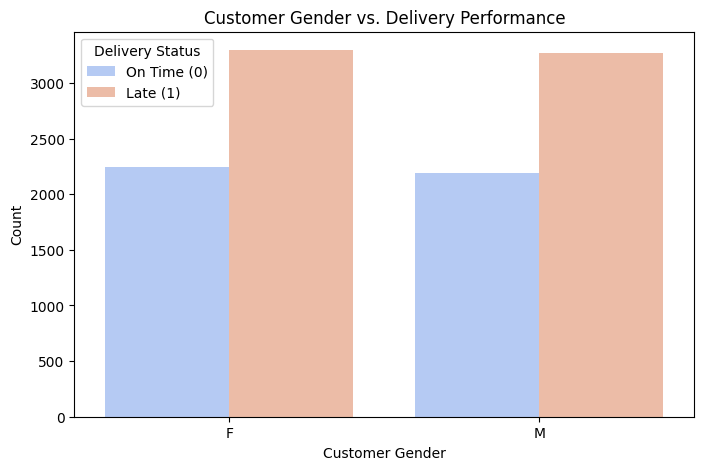

In [25]:
#Gender vs. Delivery Time
#Does gender affect on-time vs. late deliveries?
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df, palette="coolwarm")
plt.xlabel("Customer Gender")
plt.ylabel("Count")
plt.title("Customer Gender vs. Delivery Performance")
plt.legend(title="Delivery Status", labels=["On Time (0)", "Late (1)"])
plt.show()


This shows 
1.Do male or female customers make more purchases?
2.Does gender impact delivery delays?
3.Are female customers experiencing more or fewer delays than males?

Observation: There is no significant impact of gender on delivery time.
Impact: Gender is not an important feature for predicting delivery delays.




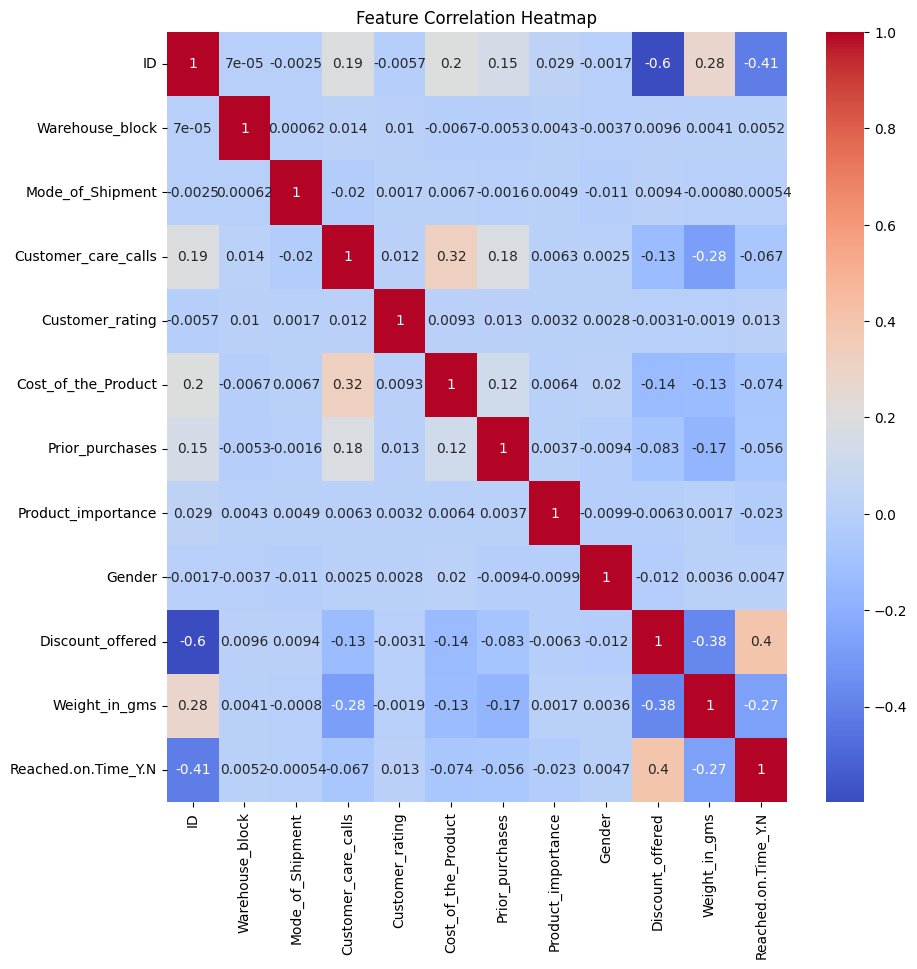

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Strong Negative Correlations
## Discount_offered and Reached_on_Time_Y_N (-0.41):
A correlation of -0.41 indicates a moderate negative relationship. This means that as the discount offered on a product increases, the likelihood of that product being delivered on time decreases. In other words, products with higher discounts are more likely to be delivered late.
## Discount_offered and Weight_in_gms (-0.38):
A correlation of -0.38 suggests that there is a moderate negative relationship between the weight of the product and the discount offered. This implies that heavier products tend to have lower discounts. As the weight of the product increases, the discount offered on it tends to decrease.


# Strong Positive Correlations
## Cost_of_the_Product and Discount_offered (0.4):
A correlation of 0.4 indicates a moderate positive relationship. This means that as the cost of the product increases, the discount offered on that product also tends to increase. Higher-cost products are more likely to have higher discounts.
# Moderate Correlations
## Customer_care_calls and Customer_rating (0.32):
A correlation of 0.32 suggests a moderate positive relationship between the number of customer care calls and customer ratings. This could imply that customers who call customer service more often tend to give higher ratings, possibly because their issues are being resolved satisfactorily.
## Cost_of_the_Product and Weight_in_gms (0.28):
A correlation of 0.28 indicates a moderate positive relationship between the cost of the product and its weight. This suggests that heavier products tend to be more expensive, possibly due to higher material costs or shipping expenses.

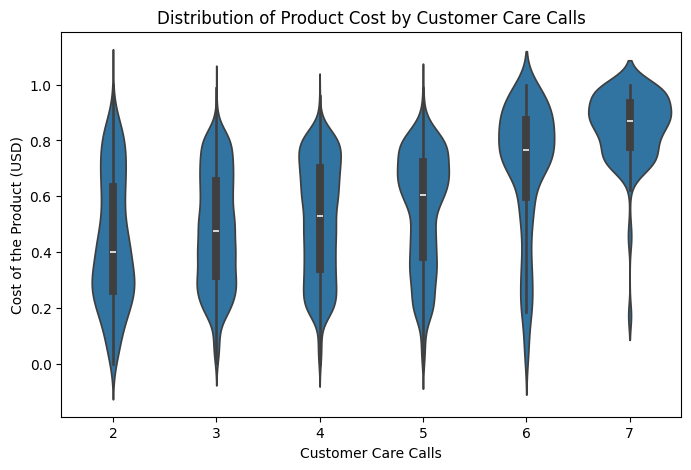

In [30]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Customer_care_calls', y='Cost_of_the_Product', data=df)
plt.xlabel("Customer Care Calls")
plt.ylabel("Cost of the Product (USD)")
plt.title("Distribution of Product Cost by Customer Care Calls")
plt.show()


It is clear that customer are more concern regarding the delivery of the product when the cost of the product is high. This is the reason that they call the customer care to know the status of the product. So, it is important to make sure the delivery of the product is on time when the cost of the product is high.

# Encoding & Scaling
Data Preprocessing to prepare the data for machine learning.

1. Encoding Categorical Variables (Convert text into numbers)
2. Scaling Numerical Features (Normalize values like cost & weight)
3. Splitting Data into Train & Test Sets (Prepare for model training)

Encoding Categorical Variables
Since machine learning models only work with numbers, i need to convert categorical variables into numerical values.

 Encoding Categorical Columns
I will use Label Encoding to convert:

Mode_of_Shipment (Ship, Flight, Road)
Warehouse_block (A, B, C, D, E)
Product_importance (Low, Medium, High)
Gender (Male, Female)

In [26]:
# Encoding Categorical Variables
#Since machine learning models only work with numbers, we must convert categorical features into numerical values.
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Mode_of_Shipment', 'Warehouse_block', 'Product_importance', 'Gender']

# Apply encoding
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows to confirm changes
print(df.head())


   ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177                3                   1   
1                5                  216                2                   1   
2                2                  183                4                   1   
3                3                  176                4                   2   
4                2                  184                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0       0                44           1233                    

Scaling Numerical Features
I need to normalize numerical features to bring them to a similar scale.

I will scale these columns:

Cost_of_the_Product
Weight_in_gms
Discount_offered
Using MinMaxScaler, I will transform these values into a range between 0 and 1.

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
num_cols = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Confirm scaling
print(df.head())


   ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2             0.378505                3                   1   
1                5             0.560748                2                   1   
2                2             0.406542                4                   1   
3                3             0.373832                4                   2   
4                2             0.411215                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0       0          0.671875       0.033893                    

Splitting Data into Train & Test Sets
I need to divide the dataset into:
1.Training Set (80%) → Used to train the machine learning model.
2.Test Set (20%) → Used to evaluate how well the model performs on unseen data.



In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Reached.on.Time_Y.N'])  # Features
y = df['Reached.on.Time_Y.N']  # Target variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm split sizes
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)


Training Set Size: (8799, 11)
Test Set Size: (2200, 11)
